In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns


In [2]:
datau=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-08.TAUX.nc')
plotvaru = datau.variables['TAUX'][0,:450:12,1000:1600:12]
lontu = datau.variables['ULONG'][:450:12,1000:1600:12]
lattu = datau.variables['ULAT'][:450:12,1000:1600:12]
plotvaru[plotvaru == 0.0] = np.nan
plotvaru[plotvaru >  1000] = np.nan

In [3]:
datav=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-08.TAUY.nc')
plotvarv = datav.variables['TAUY'][0,:450:12,1000:1600:12]
lontv = datav.variables['ULONG'][:450:12,1000:1600:12]
lattv = datav.variables['ULAT'][:450:12,1000:1600:12]
plotvarv[plotvarv == 0.0] = np.nan
plotvarv[plotvarv >  1000] = np.nan

In [4]:
        # Pick some of the nicer colors from the palette...
        nice_cmap=plt.get_cmap('jet')
        lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,210,220,230,240,290,300])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        new_cmap = cols.ListedColormap(lev_cmap,"jet")
        nice_levels = [0,10,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80,84,88,92,96,100]
        colorlevel = [0,20,40,60,80,100]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


Text(0.5, 0, 'Ice Quiver')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


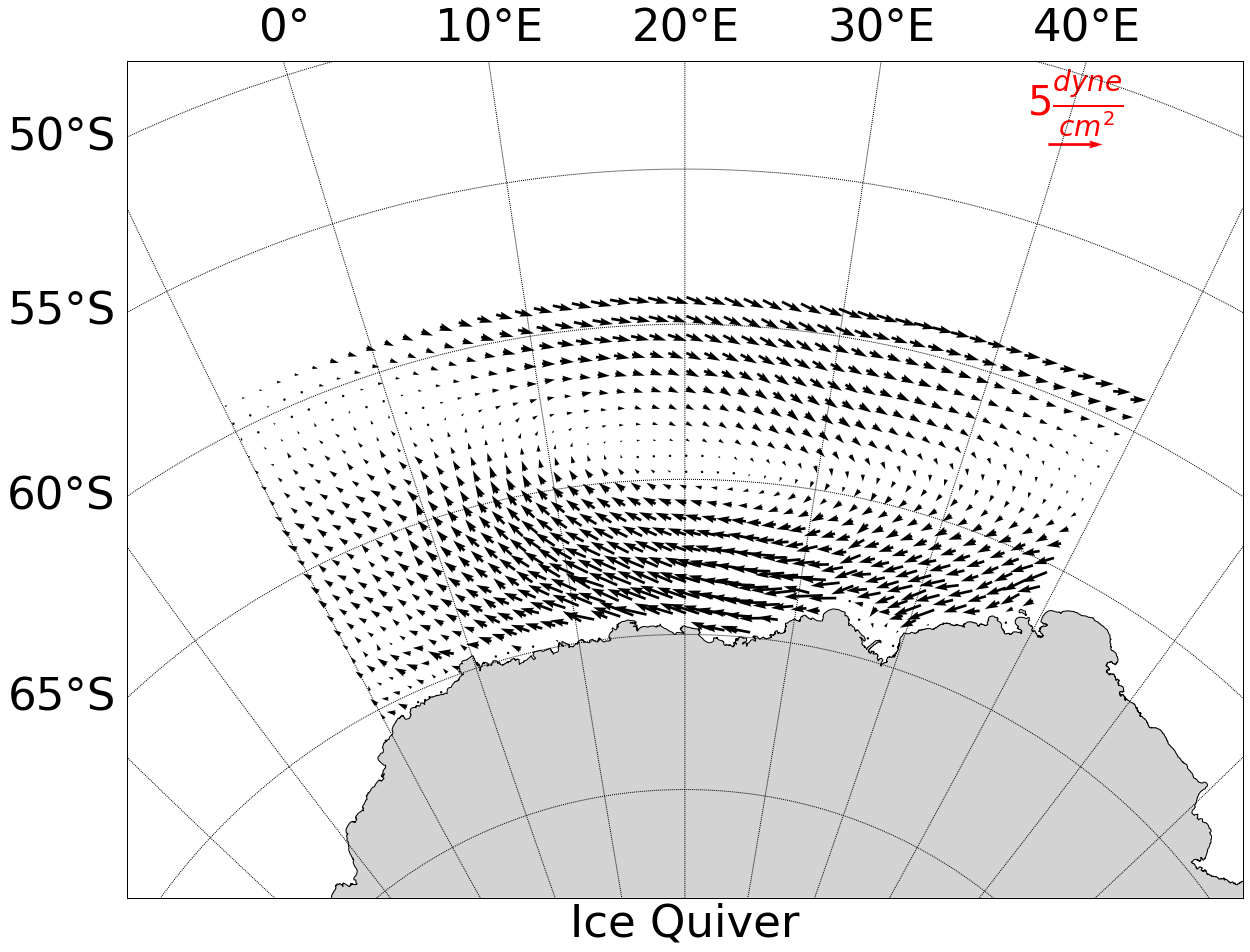

In [5]:
        plt.figure(figsize=(20,20))
        my_font = {'fontname':'Cambria', 'size':'45'}

        map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 20,area_thresh = 100,\
                     width = 4000000,height = 3000000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

        x,y=map(lontu,lattu)
        CP = map.quiver(x,y,plotvaru,plotvarv,units='inches')#,range(0,100),cmap = new_cmap,norm =norm,spacing = 'uniform',\
                 # levels = nice_levels)
        Q = plt.quiverkey(CP, 0.85, 0.9, 5, r'$ 5\frac{dyne}{cm^2}$',fontproperties={'size': '40'}, color='r', labelcolor='r')
        plt.xlabel("Ice Quiver",**my_font)

        #CP = map.contourf(x,y,plotvar,vmin = 0.000000001, vmax = 100, cmap=new_cmap)
        #cbar =map.colorbar(CP,ticks=colorlevel)
        #cbar.ax.tick_params(labelsize=45)

        #plt.suptitle('SEA ICE AREA  ')
# it is important to save the images in a very sequential manner or ffmpeg will not work !!!
        #plt.savefig('aice'+y +'-' + m+ '.png')
        #plt.savefig("/scratch/user/xiliangdiao/plot/video3/PSP_%04d.png"%(i))